# Analisi Dati COVID-19 nel mondo

Questo notebook analizza i dati aggiornati da https://github.com/datasets/covid-19 sul numero di contagi di <b>Covid-19</b> per nazioni.<br>
È possibile:
* Visualizzare i dati cumulativi per nazione
* Visualizzare la mortalità delle nazioni più colpite
* Visualizzare i dati per date delle nazioni più colpite
* In aggiornamento...

### Import delle librerie, impostazioni

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request, json 
from io import StringIO
import matplotlib.dates as mdates

%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 7]

pd.set_option('display.max_columns', None) # show all columns
#pd.set_option('display.max_rows', None) # show all rows

### Lettura dai raw del file .csv, prima ispezione

In [2]:
with urllib.request.urlopen("https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv") as url:
    res = url.read().decode()

ts = StringIO(res)
df = pd.read_csv(ts)

odf = df # keep a copy
df.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0,0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0,0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0,0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0,0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0,0


### Drop colonne inutilizzate

In [3]:
df = odf.drop(['Province/State', 'Lat', 'Long'], axis=1)

### Drop Nazioni con meno di 5k casi

In [4]:
df = df[df['Confirmed']>5000]

### Trasformazione della colonna 'data' (string -> datetime)

In [5]:
df['Date'] = pd.to_datetime(df.Date)
df = df.sort_values('Date')

### Funzione di Plot

In [6]:
def plotStack(N, M, X_conf, X_deaths, Y):
    ind = np.arange(M)    
    p1 = plt.bar(ind, X_conf)
    p2 = plt.bar(ind, X_deaths, bottom=X_conf)

    plt.ylabel('Cases')
    plt.title('Positive & Deaths')
    plt.xticks(ind, Y)
    plt.legend((p1[0], p2[0]), ('Positive', 'Deaths'))

    plt.show()

### Totale positivi e morti

In [7]:
last_date = max(df['Date'])

dft = df[df['Date']==last_date]
dft = dft.drop(['Date'], axis = 1)
dft['Positive'] = dft['Confirmed'] - dft['Deaths']
dft = dft.sort_values('Confirmed')

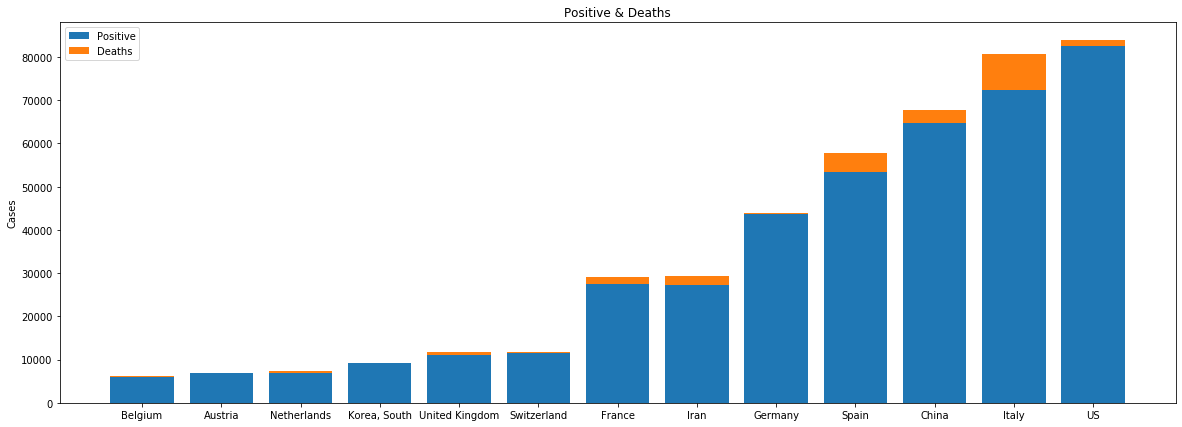

In [8]:
plotStack(dft.shape[1], dft.shape[0], dft['Positive'], dft['Deaths'], dft['Country/Region'])

### Totale positivi e morti normalizzato

In [9]:
dftr = dft
dftr['Rate'] = dftr['Positive']/dftr['Confirmed']
dftr = dftr.sort_values('Rate')

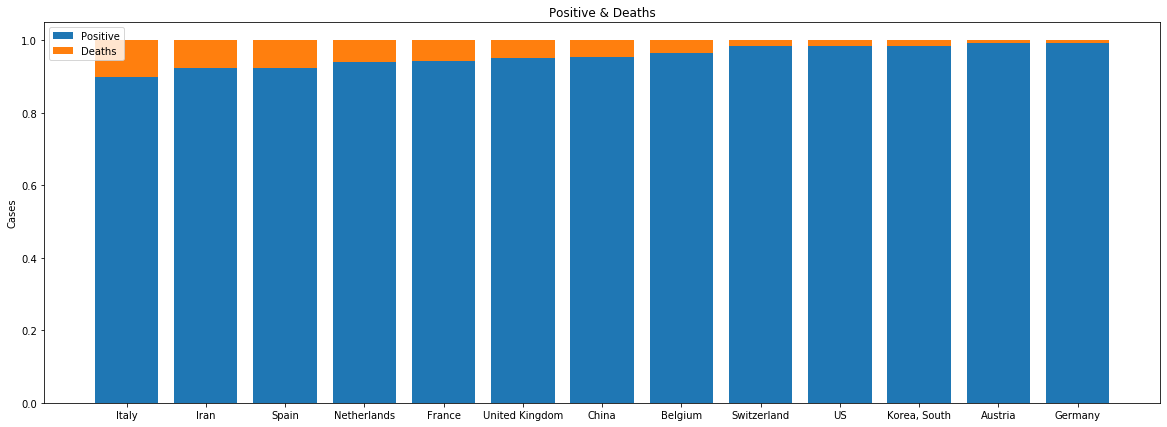

In [10]:
plotStack(dftr.shape[1], dftr.shape[0], dftr['Rate'], dftr['Deaths']/dftr['Confirmed'], dftr['Country/Region'])

### Mortalità

In [11]:
print("Deaths rate:\n")
for index, row in dftr.iterrows():
    print("%0.2f"%((row['Deaths']/dftr['Confirmed'][index])*100),"% ==>", dft['Country/Region'][index])

Deaths rate:

10.19 % ==> Italy
7.60 % ==> Iran
7.55 % ==> Spain
5.84 % ==> Netherlands
5.82 % ==> France
4.96 % ==> United Kingdom
4.67 % ==> China
3.53 % ==> Belgium
1.62 % ==> Switzerland
1.44 % ==> US
1.42 % ==> Korea, South
0.71 % ==> Austria
0.61 % ==> Germany


### Plot Nazioni

In [12]:
def plotCum(X, Y, legend):
    fig, ax = plt.subplots()
    ax.plot(Y, X)
    ax.set_xticks(Y)
    plt.xticks(rotation=60)  

    plt.legend(legend)
    plt.grid()
    plt.show()

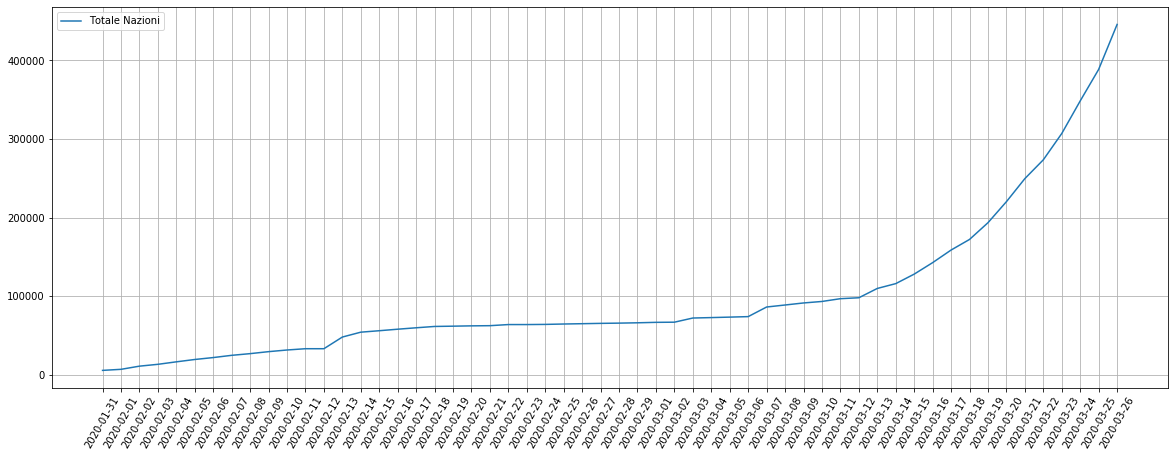

In [13]:
df_n = df.groupby(['Date'])

legend = ['Totale Nazioni']
X = df_n['Confirmed'].sum()
Y = df['Date'].unique()

plotCum(X, Y, legend)

In [14]:
def getX(country):
    dfn = df[df['Country/Region']==country]
    df_n = dfn.groupby(['Date'])
    return df_n['Confirmed'].sum()

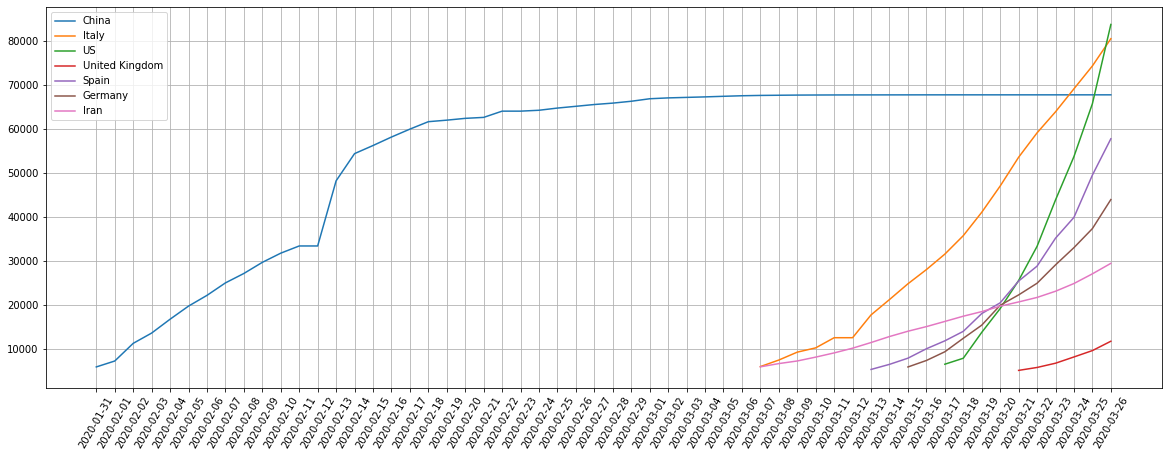

In [15]:
countries = ['China', 'Italy', 'US', 'United Kingdom', 'Spain', 'Germany', 'Iran']

for country in countries:
        plt.plot(getX(country))

Y = df['Date'].unique()
plt.legend(countries)
plt.xticks(Y)
plt.xticks(rotation=60)  
plt.grid()
plt.show()